# Классификация Oxford Pets

Обучим сеть для классификации исходного датасета [Oxford-IIIT Dataset](https://www.robots.ox.ac.uk/~vgg/data/pets/). Загрузите датасет с Kaggle.

In [1]:
import wget
import tarfile

url = 'http://www.soshnikov.com/permanent/data/petfaces.tar.gz'
filename = wget.download(url)

tar = tarfile.open(filename, 'r:gz')
tar.extractall()
tar.close()

Для визуализации изображений используйте функцию:

In [63]:
import matplotlib.pyplot as plt

def display_images(l,titles=None,fontsize=25):
    n=len(l)
    fig,ax = plt.subplots(1,n)
    for i,im in enumerate(l):
        ax[i].imshow(im)
        ax[i].axis('off')
        if titles is not None:
            ax[i].set_title(titles[i],fontsize=fontsize)
    fig.set_size_inches(fig.get_size_inches()*n)
    plt.tight_layout()
    plt.show()

In [93]:
from sklearn.preprocessing import LabelEncoder
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

DATASET_PATH = "petfaces"
IMG_SIZE = 128

def load_dataset(type=None):
    images = []
    labels = []
    for dirname in os.listdir(DATASET_PATH):
        for filename in os.listdir(os.path.join(DATASET_PATH, dirname)):
            img = Image.open(os.path.join(DATASET_PATH, dirname, filename))
            img = img.resize((IMG_SIZE, IMG_SIZE))
            img_array = np.array(img)
            images.append(img_array)
            if type == 'multi':
                labels.append(dirname)
            else:
                if "cat" in dirname:
                    labels.append(0)
                else:
                    labels.append(1)
    return np.array(images), np.array(labels)

def split_dataset(images, labels):
    return train_test_split(images, labels, test_size=0.2, random_state=42)

def preprocess_dataset(type=None):
    images, labels = load_dataset(type)
    if type == 'multi':
        labels = label_encoder.fit_transform(labels)
    else:
        labels = labels.reshape((-1, 1))
    images = images.astype('float32') / 255.0
    return split_dataset(images, labels)

def build_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

def train_model(model, X_train, y_train):
    model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.2)

def evaluate_model(model, X_test, y_test):
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f"Test Loss: {loss:.4f}")
    print(f"Test Accuracy: {accuracy:.4f}")


In [94]:
X_train, X_test, y_train, y_test = preprocess_dataset()
model = build_model()
train_model(model, X_train, y_train)
evaluate_model(model, X_test, y_test)

Epoch 1/10
65/65 [==============================] - 21s 295ms/step - loss: 0.5610 - accuracy: 0.7479 - val_loss: 0.3981 - val_accuracy: 0.8346
Epoch 2/10
65/65 [==============================] - 19s 299ms/step - loss: 0.2573 - accuracy: 0.8925 - val_loss: 0.3355 - val_accuracy: 0.8599
Epoch 3/10
65/65 [==============================] - 19s 294ms/step - loss: 0.1508 - accuracy: 0.9421 - val_loss: 0.3077 - val_accuracy: 0.8852
Epoch 4/10
65/65 [==============================] - 19s 299ms/step - loss: 0.0734 - accuracy: 0.9732 - val_loss: 0.3628 - val_accuracy: 0.8638
Epoch 5/10
65/65 [==============================] - 20s 306ms/step - loss: 0.0377 - accuracy: 0.9893 - val_loss: 0.4406 - val_accuracy: 0.8833
Epoch 6/10
65/65 [==============================] - 20s 302ms/step - loss: 0.0217 - accuracy: 0.9946 - val_loss: 0.5185 - val_accuracy: 0.8852
Epoch 7/10
65/65 [==============================] - 20s 315ms/step - loss: 0.0150 - accuracy: 0.9966 - val_loss: 0.5416 - val_accuracy: 0.8813

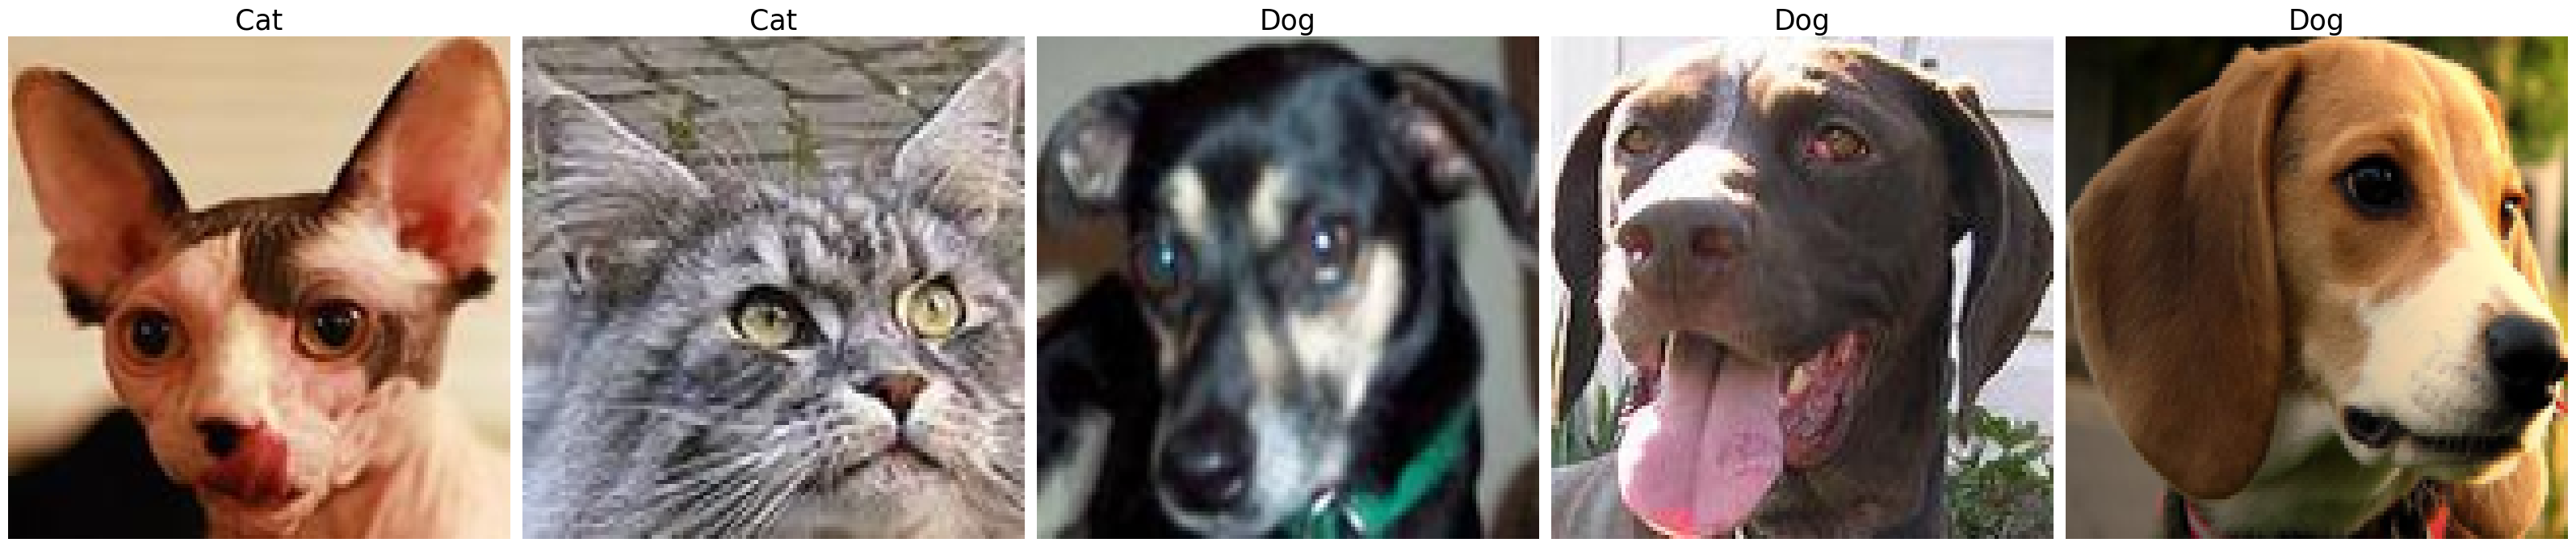

In [95]:
sample_images = X_train[:5]
sample_labels = y_train[:5]
class_names = ['Cat', 'Dog']
titles = [class_names[label[0]] for label in sample_labels]
display_images(sample_images, titles, fontsize=25)

In [67]:
def classify_image(image_path, model):
    img = Image.open(image_path)
    img = img.resize((IMG_SIZE, IMG_SIZE))
    img_array = np.array(img)
    img_array = img_array.reshape(1, IMG_SIZE, IMG_SIZE, 3)
    img_array = img_array.astype('float32') / 255.0  # Normalize image

    prediction = model.predict(img_array)
    class_names = ['Cat', 'Dog']
    predicted_class = class_names[int(prediction[0, 0])]

    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted Class: {predicted_class}")
    plt.show()

1/1 [==============================] - 0s 123ms/step


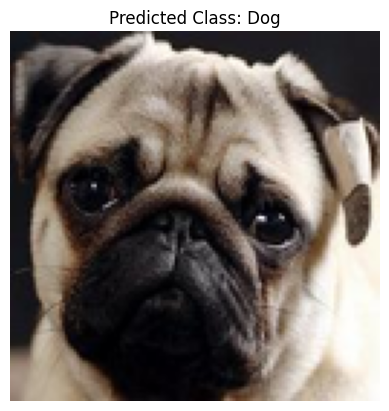

In [68]:
classify_image('petfaces/dog_pug/pug_11.jpg', model)

## Мультиклассовая классификация

In [81]:
def build_model_multi(num_classes):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

In [82]:
def train_model(model, X_train, y_train):
    model.fit(X_train, y_train, batch_size=32, epochs=10, validation_split=0.2)

def evaluate_model(model, X_test, y_test):
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f"Test Loss: {loss:.4f}")
    print(f"Test Accuracy: {accuracy:.4f}")

In [91]:
label_encoder = LabelEncoder()
X_train, X_test, y_train, y_test = preprocess_dataset(type='multi')
model_multi = build_model_multi(len(os.listdir(DATASET_PATH)))
train_model(model_multi, X_train, y_train)
evaluate_model(model_multi, X_test, y_test)

Epoch 1/10
65/65 [==============================] - 15s 216ms/step - loss: 3.5513 - accuracy: 0.0550 - val_loss: 3.3970 - val_accuracy: 0.0953
Epoch 2/10
65/65 [==============================] - 14s 218ms/step - loss: 2.9781 - accuracy: 0.1766 - val_loss: 2.7582 - val_accuracy: 0.2121
Epoch 3/10
65/65 [==============================] - 14s 216ms/step - loss: 2.1431 - accuracy: 0.3791 - val_loss: 2.4287 - val_accuracy: 0.3230
Epoch 4/10
65/65 [==============================] - 14s 216ms/step - loss: 1.4189 - accuracy: 0.5820 - val_loss: 2.3534 - val_accuracy: 0.3230
Epoch 5/10
65/65 [==============================] - 16s 245ms/step - loss: 0.8281 - accuracy: 0.7708 - val_loss: 2.6450 - val_accuracy: 0.3599
Epoch 6/10
65/65 [==============================] - 18s 283ms/step - loss: 0.4194 - accuracy: 0.8915 - val_loss: 2.9121 - val_accuracy: 0.3482
Epoch 7/10
65/65 [==============================] - 20s 302ms/step - loss: 0.1657 - accuracy: 0.9698 - val_loss: 3.2034 - val_accuracy: 0.3521

In [84]:
def classify_image(image_path):
    img = Image.open(image_path)
    img = img.resize((IMG_SIZE, IMG_SIZE))
    img_array = np.array(img)
    img_array = img_array.reshape(1, IMG_SIZE, IMG_SIZE, 3)
    img_array = img_array.astype('float32') / 255.0  # Normalize image

    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction)
    predicted_breed = label_encoder.inverse_transform([predicted_class_index])[0]

    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted Breed: {predicted_breed}")
    plt.show()

1/1 [==============================] - 0s 141ms/step


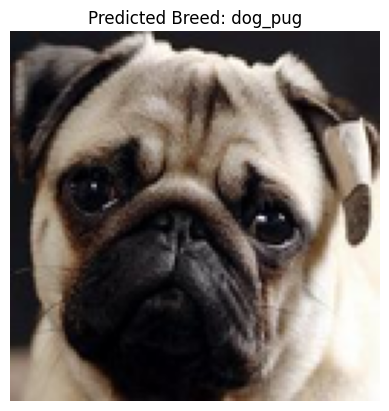

In [85]:
classify_image('petfaces/dog_pug/pug_11.jpg')

1/1 [==============================] - 0s 47ms/step


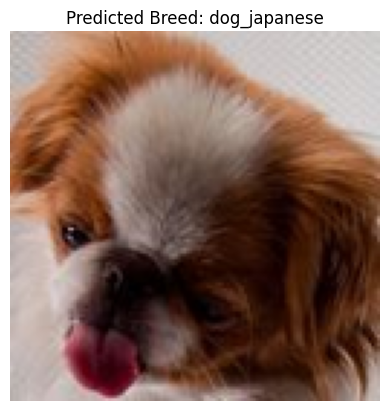

In [86]:
classify_image('petfaces/dog_japanese/japanese_chin_12.jpg')

1/1 [==============================] - 0s 56ms/step


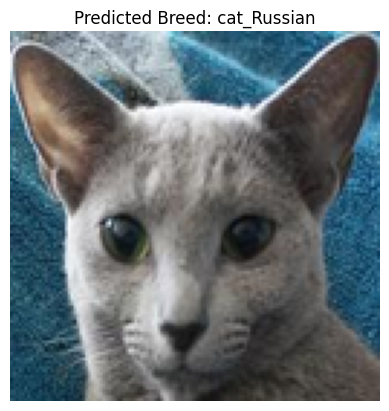

In [87]:
classify_image('petfaces/cat_Russian/Russian_Blue_14.jpg')